In [5]:
import keras
from keras.datasets import cifar10
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_class=10

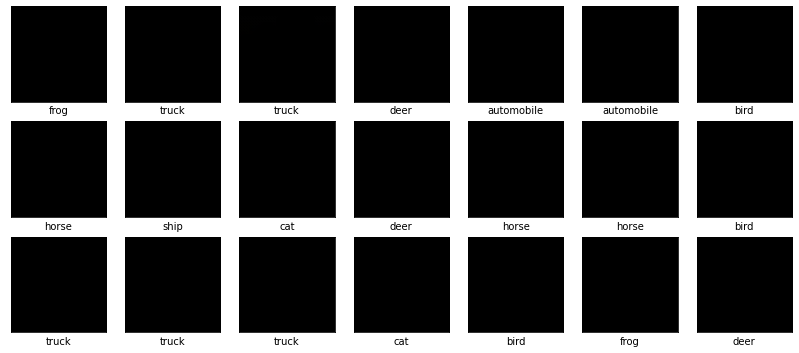

In [6]:
x_train = x_train / 255.0
y_train = to_categorical(y_train, num_class)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_class)

fig = plt.figure(figsize=(14, 6))
for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_train[i])
        class_index = y_train[i].argmax()
        plt.xlabel(class_names[class_index])
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [8]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [9]:
batch_size = 32  
epochs = 10
plenty_data_augmentation = True

In [10]:
history = None
if not plenty_data_augmentation:
    datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        data_format=None,
        validation_split=0.0
    )
    
    datagen.fit(x_train)

    history = model.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)
else:
    datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        zca_epsilon=1e-06,  
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0., 
        horizontal_flip=True,  
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    datagen.fit(x_train)

    history = model.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)

Epoch 1/10
1563/1563 [==============================] - 241s 144ms/step - loss: 2.3029 - accuracy: 0.1029 - val_loss: 2.3053 - val_accuracy: 0.0747
Epoch 2/10
1563/1563 [==============================] - 222s 142ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3053 - val_accuracy: 0.0912
Epoch 3/10
1563/1563 [==============================] - 222s 142ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3052 - val_accuracy: 0.1003
Epoch 4/10
1563/1563 [==============================] - 222s 142ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 223s 143ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3054 - val_accuracy: 0.1001
Epoch 6/10
1563/1563 [==============================] - 225s 144ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3054 - val_accuracy: 0.0947
Epoch 7/10
1563/1563 [==============================] - 224s 143ms/step - loss: 2.3027 - accuracy: 0.0994 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


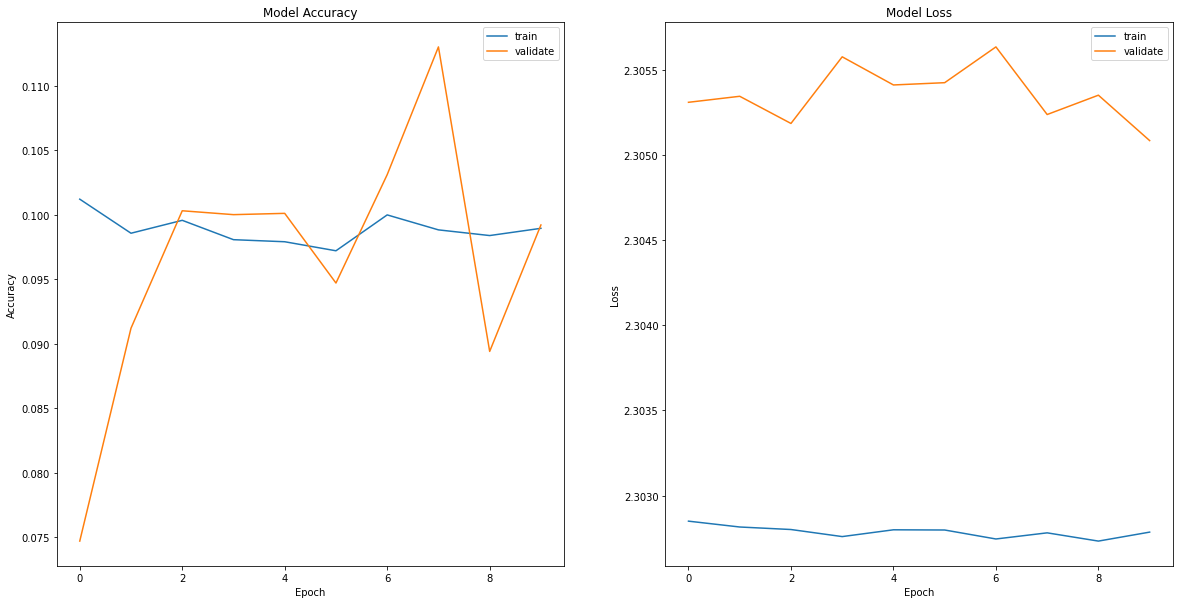

In [11]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(20,10)) 
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'])
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'])
    plt.show()

print(history.history.keys())

plotmodelhistory(history)

In [12]:
i = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', i[0])
print('Test accuracy:', i[1])
predictation = model.predict(x_test)

313/313 [==============================] - 8s 26ms/step - loss: 2.3051 - accuracy: 0.0992
Test loss: 2.305084705352783
Test accuracy: 0.09920000284910202
